In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model, preprocessing, tree
from sklearn.metrics import accuracy_score, mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt #Matplotlib 
from matplotlib import style #style


In [2]:
df = pd.read_excel('C:/Users/julie/Desktop/Data science/Datasets/ENB2012_data.xlsx')

In [3]:
df.columns = ['Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area', 'Overall_Height',
                'Orientation', 'Glazing_Area', 'Glazing_Area_Distribution', 'Heating_Load', 'Cooling_Load']

In [4]:
print (df.shape) #768x10
print (df.head(4))
print (df.describe())

(768, 10)
   Relative_Compactness  Surface_Area  Wall_Area  Roof_Area  Overall_Height  \
0                  0.98         514.5      294.0     110.25             7.0   
1                  0.98         514.5      294.0     110.25             7.0   
2                  0.98         514.5      294.0     110.25             7.0   
3                  0.98         514.5      294.0     110.25             7.0   

   Orientation  Glazing_Area  Glazing_Area_Distribution  Heating_Load  \
0            2           0.0                          0         15.55   
1            3           0.0                          0         15.55   
2            4           0.0                          0         15.55   
3            5           0.0                          0         15.55   

   Cooling_Load  
0         21.33  
1         21.33  
2         21.33  
3         21.33  
       Relative_Compactness  Surface_Area   Wall_Area   Roof_Area  \
count            768.000000    768.000000  768.000000  768.000000   


In [5]:
print(df.dtypes)

Relative_Compactness         float64
Surface_Area                 float64
Wall_Area                    float64
Roof_Area                    float64
Overall_Height               float64
Orientation                    int64
Glazing_Area                 float64
Glazing_Area_Distribution      int64
Heating_Load                 float64
Cooling_Load                 float64
dtype: object


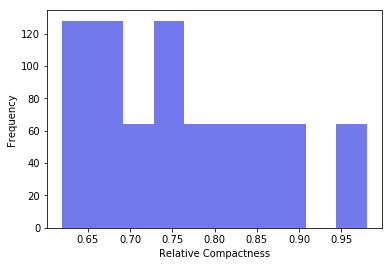

In [6]:
#Relative_Compactness
plt.figure()
plt.hist(df.Relative_Compactness, color = '#3541e5', alpha = 0.7) 
plt.xlabel('Relative Compactness')
plt.ylabel('Frequency')
plt.grid(False)

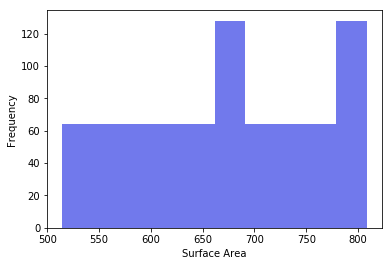

In [7]:
#Surface_Area
plt.figure()
plt.hist(df.Surface_Area, color = '#3541e5', alpha = 0.7) 
plt.xlabel('Surface Area')
plt.ylabel('Frequency')
plt.grid(False)

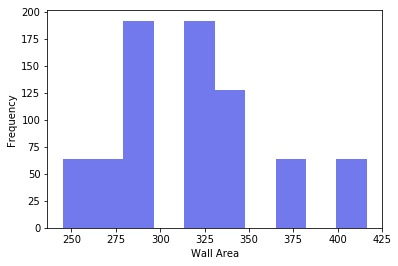

In [8]:
#Wall_Area
plt.figure()
plt.hist(df.Wall_Area, color = '#3541e5', alpha = 0.7) 
plt.xlabel('Wall Area')
plt.ylabel('Frequency')
plt.grid(False)

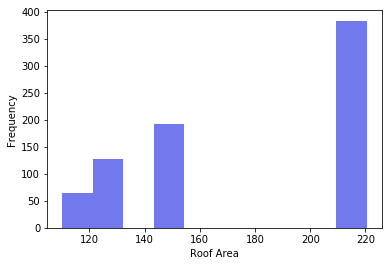

In [9]:
#Roof_Area
plt.figure()
plt.hist(df.Roof_Area, color = '#3541e5', alpha = 0.7)
plt.xlabel('Roof Area')
plt.ylabel('Frequency')
plt.grid(False)

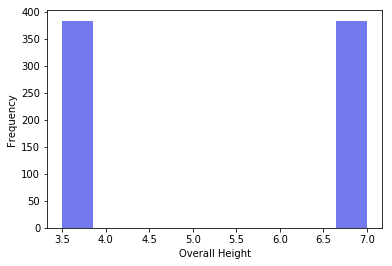

In [10]:
#Overall_Height
plt.figure()
plt.hist(df.Overall_Height, color = '#3541e5', alpha = 0.7)
plt.xlabel('Overall Height')
plt.ylabel('Frequency')
plt.grid(False)

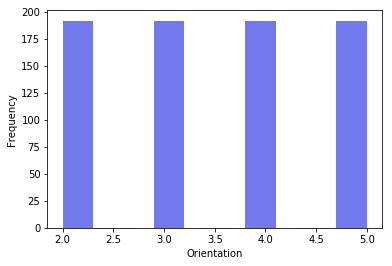

In [11]:
#Orientation
plt.figure()
plt.hist(df.Orientation, color = '#3541e5', alpha = 0.7)
plt.xlabel('Orientation')
plt.ylabel('Frequency')
plt.grid(False)

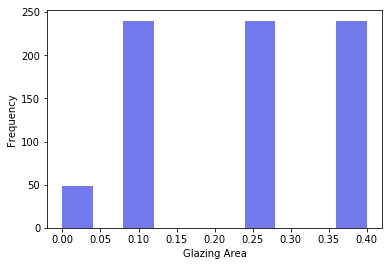

In [12]:
#Glazing_Area
plt.figure()
plt.hist(df.Glazing_Area, color = '#3541e5', alpha = 0.7)
plt.xlabel('Glazing Area')
plt.ylabel('Frequency')
plt.grid(False)

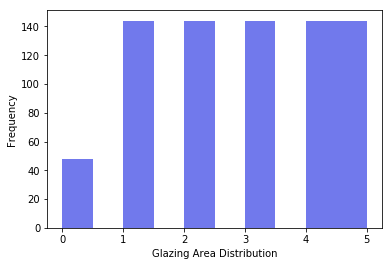

In [13]:
#Glazing_Area_Distribution
plt.figure()
plt.hist(df.Glazing_Area_Distribution, color = '#3541e5', alpha = 0.7)
plt.xlabel('Glazing Area Distribution')
plt.ylabel('Frequency')
plt.grid(False)

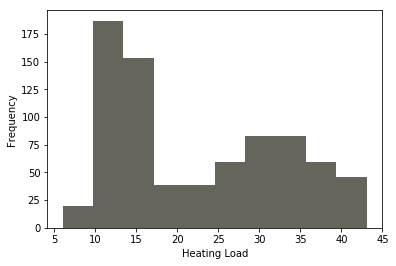

In [14]:
#Heating_Load
plt.figure()
plt.hist(df.Heating_Load, color = '#242416', alpha = 0.7)
plt.xlabel('Heating Load')
plt.ylabel('Frequency')
plt.grid(False)

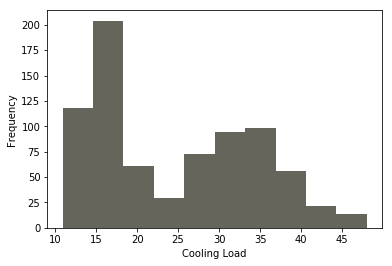

In [15]:
#Cooling_Load
plt.figure()
plt.hist(df.Cooling_Load, color = '#242416', alpha = 0.7)
plt.xlabel('Cooling Load')
plt.ylabel('Frequency')
plt.grid(False)

In [16]:
y1 = df[['Heating_Load']]
y2 = df[['Cooling_Load']]
data = df.drop(['Cooling_Load','Heating_Load'],axis=1)
X = data.iloc[:,]

In [17]:
X.shape

(768, 8)

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X,y1,test_size = 0.2, random_state= 0)
mse_values1 = []
variance_score1 = []

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train2, y_test2 =  train_test_split(X,y2,test_size = 0.2, random_state= 0)
mse_values2 = []
variance_score2 = []

In [23]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [24]:
print("X_train shape --> {}".format(X_train.shape))
print("y_train shape --> {}".format(y_train.shape))
print("X_test shape --> {}".format(X_test.shape))
print("y_test shape --> {}".format(y_test.shape))

X_train shape --> (614, 8)
y_train shape --> (614, 1)
X_test shape --> (154, 8)
y_test shape --> (154, 1)


In [26]:
LR = linear_model.SGDRegressor(max_iter=1000, tol=1e-3, penalty = 'l1')
model1= LR.fit(X_train, y_train)
predicted_y = LR.predict(X_test)
print("Mean squared error: ", mean_squared_error(y_test, predicted_y))
print('Variance score: %.2f' % r2_score(y_test, predicted_y))

mse_values1.append(mean_squared_error(y_test, predicted_y))
variance_score1.append(r2_score(y_test, predicted_y))

Mean squared error:  11.213197021793643
Variance score: 0.90


C:\Users\julie\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [27]:
LR2 = linear_model.SGDRegressor(max_iter=1000, tol=1e-3, penalty = 'l1')
model2= LR2.fit(X_train, y_train2)
predicted_y2 = LR2.predict(X_test)
print("Mean squared error2: ", mean_squared_error(y_test2, predicted_y2))
print('Variance score2: %.2f' % r2_score(y_test2, predicted_y2))

mse_values2.append(mean_squared_error(y_test2, predicted_y2))
variance_score2.append(r2_score(y_test2, predicted_y2))

Mean squared error2:  11.290031083809021
Variance score2: 0.88


C:\Users\julie\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [30]:
LR.score(X_train,y_train)

0.9148429253933645

In [29]:
LR2.score(X_train,y_train2)

0.8857645276806724

In [31]:
print('intercept:', model1.intercept_)

intercept: [22.16269495]


In [32]:
print('intercept:', model2.intercept_)

intercept: [24.52368651]


In [33]:
print('slope:', model1.coef_)

slope: [-1.92807023 -1.15655396  1.86891109 -2.02602298  6.86083699 -0.03934761
  2.65045659  0.24002363]


In [34]:
print('slope:', model2.coef_)

slope: [-2.82345103 -1.15895622  1.02603944 -1.62543385  7.89440879  0.16025483
  2.00458481  0.02832172]


In [ ]:
decision_tree = tree.DecisionTreeRegressor(max_depth=3)

In [35]:
LR_scores = cross_val_score(LR, X_train, y_train, cv = 10)
print("Accuracy on training set: {:.3f}".format(LR.score(X_train,y_train)))
print("Accuracy on test set: {:.3f}".format(LR.score(X_test,y_test)))

Accuracy on training set: 0.915
Accuracy on test set: 0.898


C:\Users\julie\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\julie\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\julie\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\julie\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

In [36]:
LR2_scores = cross_val_score(LR2, X_train, y_train2, cv = 10)
print("Accuracy on training set: {:.3f}".format(LR2.score(X_train,y_train2)))
print("Accuracy on test set: {:.3f}".format(LR2.score(X_test,y_test2)))

Accuracy on training set: 0.886
Accuracy on test set: 0.880


C:\Users\julie\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\julie\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\julie\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\julie\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

In [38]:
decision_tree = tree.DecisionTreeRegressor(max_depth=3)

In [40]:
d =decision_tree.fit(X_train, y_train)
predicted_y = decision_tree.predict(X_test)
print("Mean squared error: ", mean_squared_error(y_test, predicted_y))
print('Variance score: %.2f' % r2_score(y_test, predicted_y))

mse_values1.append(mean_squared_error(y_test, predicted_y))
variance_score1.append(r2_score(y_test, predicted_y))

Mean squared error:  6.417958206386818
Variance score: 0.94


In [41]:
d2 =decision_tree.fit(X_train, y_train2)
predicted_y2 = decision_tree.predict(X_test)
print("Mean squared error: ", mean_squared_error(y_test2, predicted_y2))
print('Variance score: %.2f' % r2_score(y_test2, predicted_y2))

mse_values2.append(mean_squared_error(y_test2, predicted_y2))
variance_score2.append(r2_score(y_test2, predicted_y2))

Mean squared error:  7.150202385390337
Variance score: 0.92


In [42]:
decision_tree.score(X_train,y_train)

0.8777377493929123

In [43]:
decision_tree.score(X_test,y_test)

0.8800064898350551

In [44]:
decision_tree.score(X_train,y_train2)

0.9310314256947049

In [45]:
decision_tree.score(X_test,y_test2)

0.923978972480023

In [46]:
d.feature_importances_

array([0.01348704, 0.07632682, 0.00924506, 0.        , 0.86189526,
       0.        , 0.03904582, 0.        ])

In [47]:
d2.feature_importances_

array([0.01348704, 0.07632682, 0.00924506, 0.        , 0.86189526,
       0.        , 0.03904582, 0.        ])

In [48]:
dt_scores = cross_val_score(decision_tree, X_train, y_train, cv = 10)
print("Accuracy on training set: {:.3f}".format(decision_tree.score(X_train,y_train)))
print("Accuracy on test set: {:.3f}".format(decision_tree.score(X_test,y_test)))

Accuracy on training set: 0.878
Accuracy on test set: 0.880


In [49]:
dt_scores2 = cross_val_score(decision_tree, X_train, y_train2, cv = 10)
print("Accuracy on training set: {:.3f}".format(decision_tree.score(X_train,y_train2)))
print("Accuracy on test set: {:.3f}".format(decision_tree.score(X_test,y_test2)))

Accuracy on training set: 0.931
Accuracy on test set: 0.924
